In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

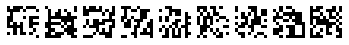

In [3]:
# Generate white noise samples

alphabet_len = 9
im_size = (10, 10)
np.random.seed(42)

white_noise_dataset = np.random.randint(0, 2, 
                                        size=(alphabet_len, im_size[0] * im_size[1]), 
                                        dtype='int') * 2 - 1

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


In [4]:
# hop_net = hopfield.HopfieldNetwork()
# pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh")
# # print(pm)

  0%|          | 0/15 [00:00<?, ?it/s]/home/doomgutt/GitHub/NMA-CN-2022-Project--Group-A---Attractor-Networks/hopfield.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = uti.plt.subplot(3, n_test_samples, i+1)
/home/doomgutt/GitHub/NMA-CN-2022-Project--Group-A---Attractor-Networks/hopfield.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = uti.plt.subplot(3, n_test_samples, n_test_samples + i+1)
/home/doomgutt/GitH

[True, True, True, True, True, True, True, True, True]
[True, False, True, False, True, False, True, False, True]
[True, True, True, True, True, True, True, True, True]
[False, True, True, True, True, True, False, True, False]


 20%|██        | 3/15 [00:01<00:07,  1.67it/s]

[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


 33%|███▎      | 5/15 [00:01<00:03,  2.60it/s]

[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


 40%|████      | 6/15 [00:01<00:02,  3.22it/s]

[True, True, True, True, True, True, True, True, True]
[True, False, True, False, True, False, True, False, True]
[True, True, True, True, True, True, True, True, True]


 47%|████▋     | 7/15 [00:02<00:02,  3.58it/s]

[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


 60%|██████    | 9/15 [00:02<00:01,  4.33it/s]

[False, True, False, True, False, True, False, True, False]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


 67%|██████▋   | 10/15 [00:02<00:01,  4.70it/s]

[True, True, True, True, True, True, True, True, True]
[False, True, False, True, True, True, True, True, False]
[True, True, True, True, True, True, True, True, True]


 80%|████████  | 12/15 [00:02<00:00,  5.74it/s]

[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


 93%|█████████▎| 14/15 [00:03<00:00,  6.78it/s]

[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


100%|██████████| 15/15 [00:03<00:00,  4.56it/s]


[True, True, True, True, True, True, True, True, True]


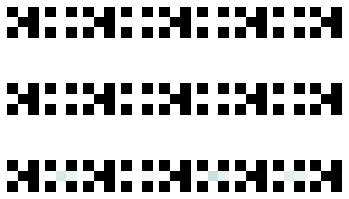

In [5]:
from tqdm import tqdm

hop_net = hopfield.HopfieldNetwork()

net_N = 16
img_N = 3

network_size_range = range(1, net_N)
alphabet_size_range = range(1, img_N)
PMs = [[] for x in network_size_range]

for N, size in enumerate(tqdm(network_size_range)):
    for alph_len in alphabet_size_range:
        # dataset
        white_noise_dataset = np.random.randint(0, 2, size=(alph_len, size), dtype='int') * 2 - 1
        
        # get data
        PMs[N].append(hop_net.run(white_noise_dataset, iterations=1000, 
                                  lr="hebbian",af="async_tanh", print_info=False))




In [6]:
print(PMs[0].shape)

AttributeError: 'list' object has no attribute 'shape'